In [1]:
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np

# ESM-2 (650M) here as an example

In [2]:
esm2_df = pd.read_pickle("../embeddings/esm2_650m_embeddings.pkl")
esm2_df = esm2_df.sort_values(by="name").reset_index(drop=True)

In [3]:
esm2_df.head()

,name,seq,embedding
0,1a0rb00_1,GNTLIKLRTNKTRSHFKQILLEWTACSSLDQLANGDTPLPRPNLEA...,"[-0.019338347, 0.04004511, -0.021763504, -0.08..."
1,1a0rb00_10,SDHNEMKDMQREMVQLMQSGIAFGAKRGHTMKADSIPALPRMRWTL...,"[-0.0068553938, 0.045937255, 0.0027827749, -0...."
2,1a0rb00_11,EDLALQRMASSFQSVKEARKLHEMHIYRRETVWDDVSPLSNINPYK...,"[0.031198354, 0.007636538, -0.002887135, -0.05..."
3,1a0rb00_12,ANDQQSVWTEEVFNSEKRKETAEEKNKALSLVMNDKPPLPKMKLQK...,"[0.020144032, 0.015431936, -0.00024650976, -0...."
4,1a0rb00_13,ILPYVLCFIAQLLGAQEMAARGTLSSMRLEEKNADTQGVQAVVPHI...,"[0.031016467, 0.0332541, 0.028199002, -0.03262..."


In [4]:
domain_names = []
for name in list(esm2_df['name']):
    domain_name = name.split("_")[0]
    if domain_name not in domain_names:
        domain_names.append(domain_name)
print(domain_names)

['1a0rb00', '1a1va01', '1a2va03', '1a44a00', '1a5aa00', '1a7va00', '1a8da02', '1a9nc00', '1a9xb01', '1b77a00', '1b9va00', '1bhea00', '1bp1a01', '1bwda00', '1c1yb00', '1c3ka00', '1c5ka02', '1cb8a01', '1cb8a02', '1ciya02', '1d8ca02', '1dl2a00', '1e2ra02', '1ea0a04', '1ee8a01', '1ejca02', '1f3ya00', '1fbla02', '1flga00', '1g8jb00', '1gofa02', '1gydb00', '1hyoa01', '1i2mb00', '1igra01', '1iuca00', '1iwla00', '1j5ua01', '1k32a01', '1l1da00', '1l5ja01', '1okca00', '1orva01', '1pg6a00', '1pprm01', '1qmha01', '1rz4a01', '1s1da00', '1tg7a02', '1tl2a00', '1tyea00', '1vmoa00', '1wrua02', '1y65a00', '1ynfa00', '1zl0b02', '2byoa00', '2g3va00', '2i9ia00', '2j9la02', '2jzda01', '2psba00', '2qgqa01', '2qp2a02', '2r5oa01', '2rcka01', '2yzsa01', '2zf3c00', '3a0oa03', '3au4a01', '3bwsa01', '3cana00', '3djma00', '3e0sa00', '3h4zb03', '3hbma01', '3k9ta02', '3kt4a02', '3m71a00', '3o4ha01', '3oh3a02', '3p5pa02', '4c91a02', '4d8ma03', '4dt5a00', '4fhda02', '4h75a00', '4iglb00', '4mvea00', '4oj5c04']


In [5]:
sequence_representations = esm2_df["embedding"].tolist()
len(sequence_representations)

1440

# SA socre

In [6]:
from itertools import combinations

In [7]:
def cosine_similarity(u, v):
    u = np.asarray(u)
    v = np.asarray(v)
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [8]:
def group_homogeneity(embedding_list, group_size=16):
    embedding_array = np.array(embedding_list)
    num_full_groups = len(embedding_array) // group_size
    homogeneity_scores = []
    
    for i in range(num_full_groups):
        group = embedding_array[i * group_size : (i + 1) * group_size]
        sims = []
        for u_idx, v_idx in combinations(range(group_size), 2):
            u = group[u_idx]
            v = group[v_idx]
            sim = cosine_similarity(u, v)
            sims.append(sim)
        avg_sim = np.mean(sims)
        homogeneity_scores.append(avg_sim)
    
    return homogeneity_scores

In [9]:
import random
shuffled_list = sequence_representations.copy()
np.random.shuffle(shuffled_list)
shuffled_homogeneity = group_homogeneity(shuffled_list)

In [10]:
embeddings = np.array(sequence_representations)
mean_vector = np.mean(embeddings, axis=0)
centered_embeddings = embeddings - mean_vector
new_mean = np.mean(centered_embeddings, axis=0)
print(f"Mean after centering (should be ~0): {np.linalg.norm(new_mean)}")

Mean after centering (should be ~0): 1.6057502989497152e-06


In [11]:
homogeneity = group_homogeneity(centered_embeddings)
print(homogeneity)

[np.float32(0.92592865), np.float32(0.63391423), np.float32(0.56260246), np.float32(0.80145824), np.float32(0.84591424), np.float32(0.22284229), np.float32(0.6670427), np.float32(0.89257073), np.float32(0.48481143), np.float32(0.53120416), np.float32(0.8128766), np.float32(0.8292468), np.float32(0.8134963), np.float32(0.35247332), np.float32(0.7640274), np.float32(0.8937477), np.float32(0.8938693), np.float32(0.2874857), np.float32(0.3989958), np.float32(0.77381134), np.float32(0.6032808), np.float32(0.64646024), np.float32(0.63107324), np.float32(0.6557429), np.float32(0.29715022), np.float32(0.3626785), np.float32(0.47775748), np.float32(0.74370855), np.float32(0.8884083), np.float32(0.775594), np.float32(0.8378929), np.float32(0.84927255), np.float32(0.7252289), np.float32(0.91541463), np.float32(0.74235815), np.float32(0.8549446), np.float32(0.1406236), np.float32(0.39368042), np.float32(0.66945326), np.float32(0.6047391), np.float32(0.60914624), np.float32(0.53537935), np.float32(

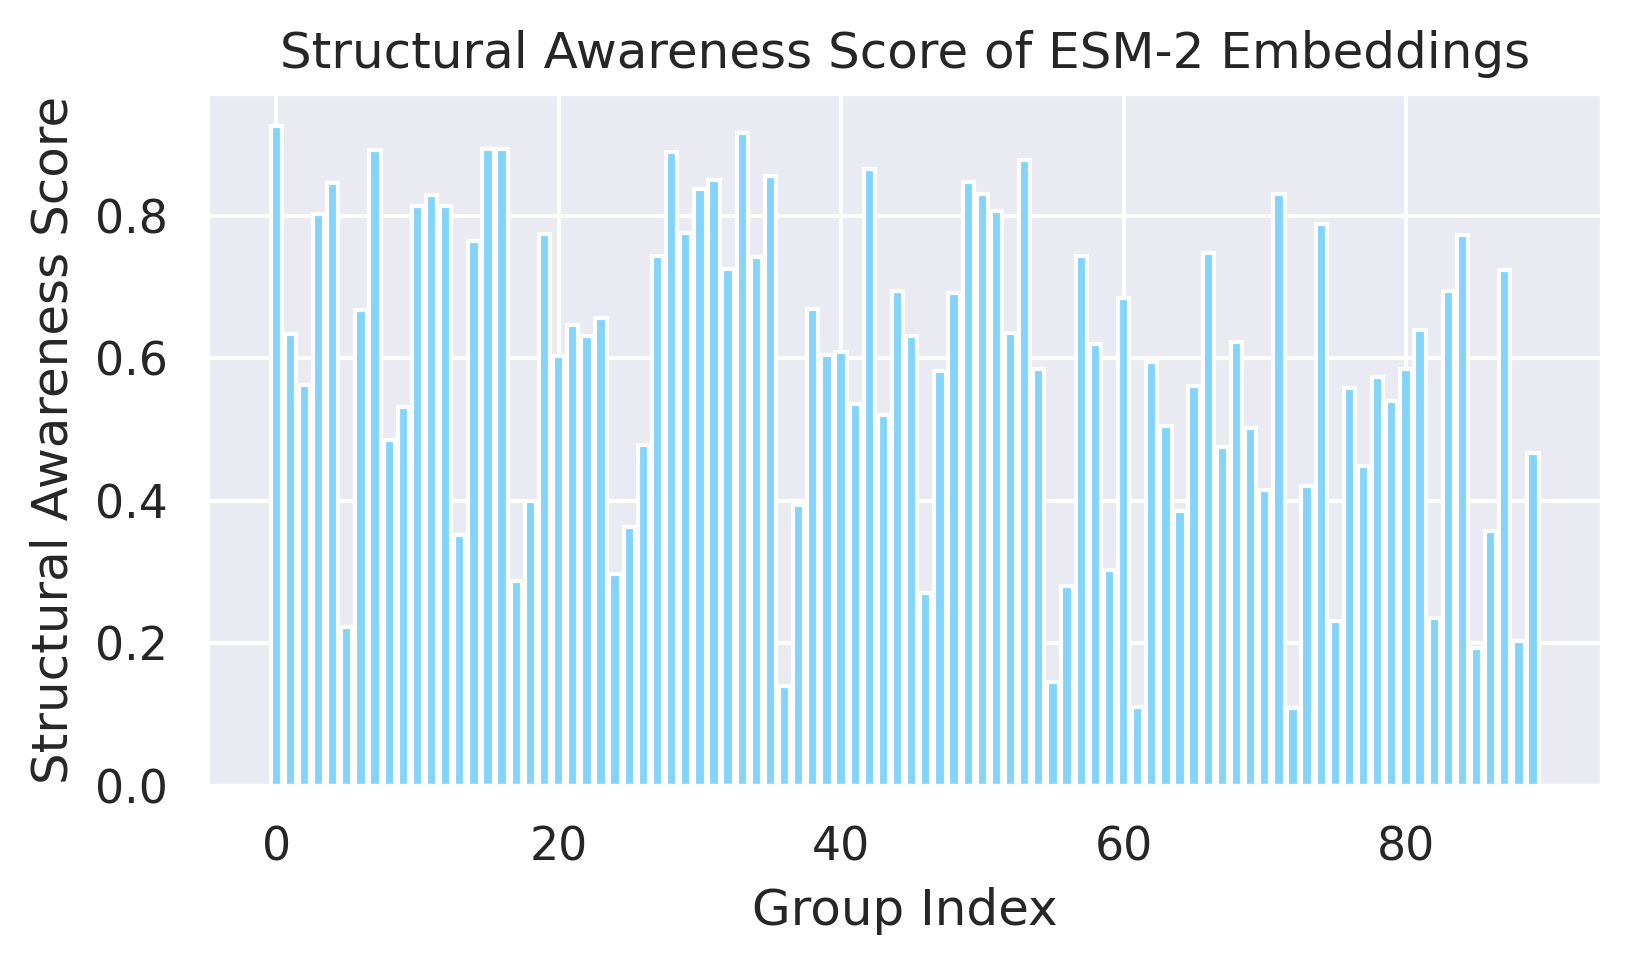

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(6, 3), dpi=300)
bars = plt.bar(range(len(homogeneity)), homogeneity, color='#82D4FA')
# add values on top of bars
#for bar in bars:
#    yval = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel('Group Index')
plt.ylabel('Structural Awareness Score')
plt.title('Structural Awareness Score of ESM-2 Embeddings')
#plt.xticks(range(len(homogeneity)), domain_names, rotation=45, fontsize=8)
plt.show()

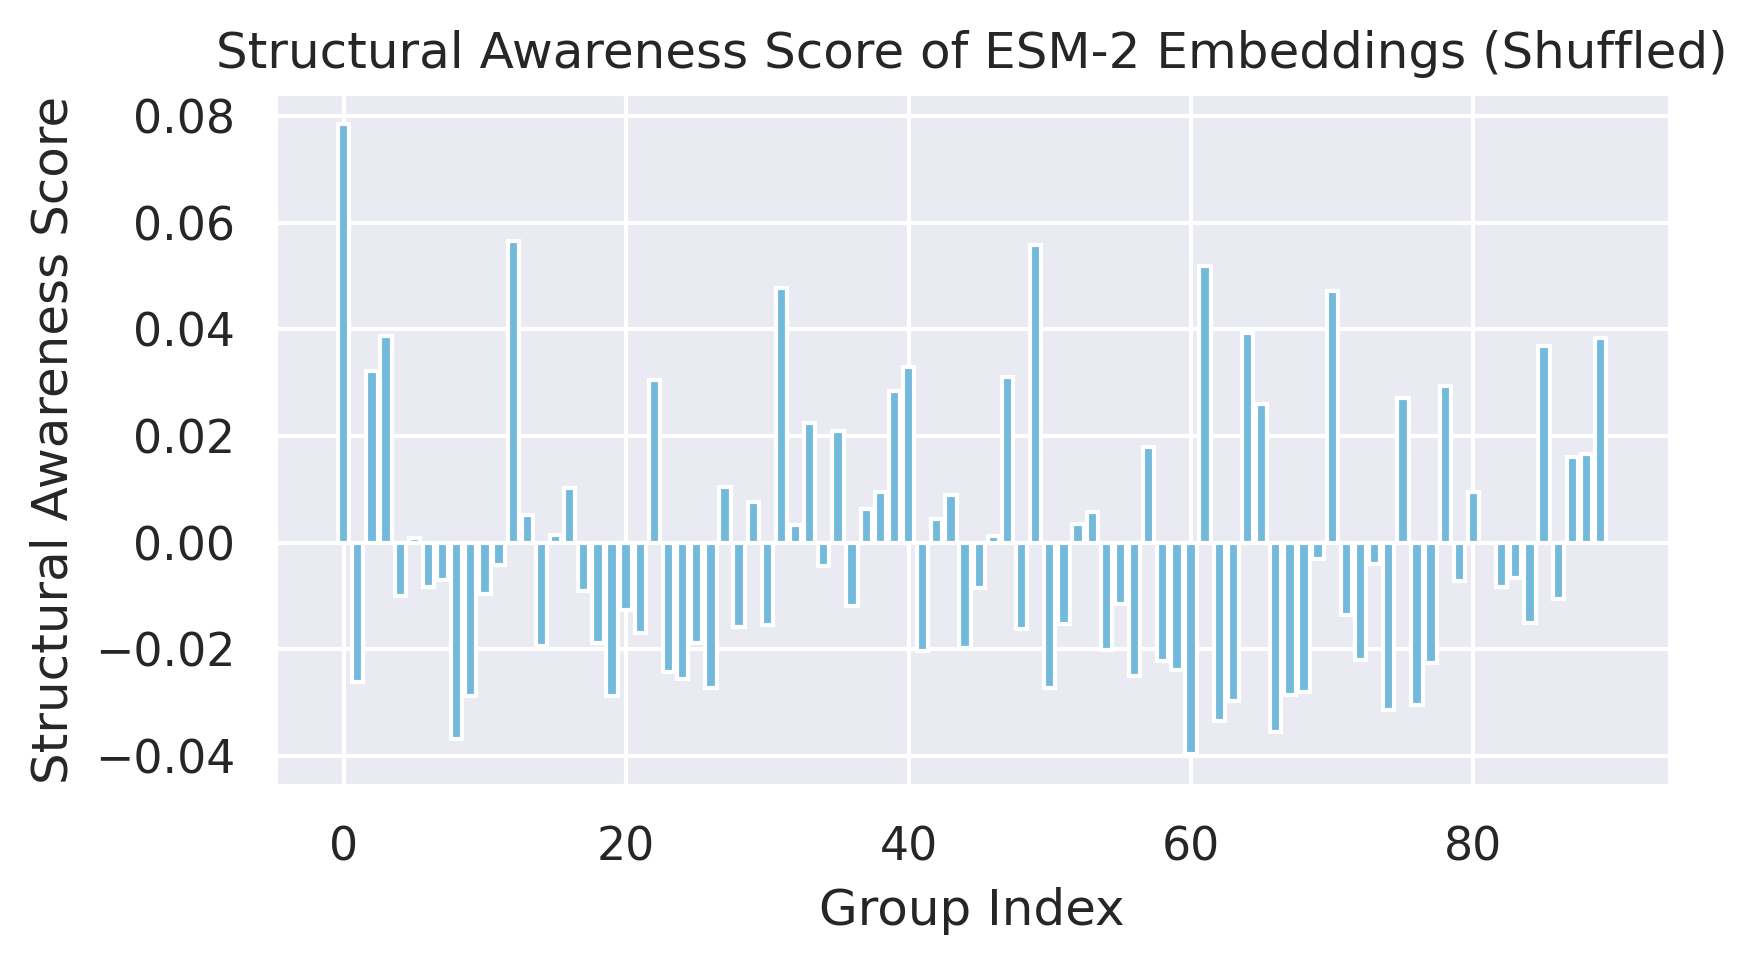

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(6, 3), dpi=300)
bars = plt.bar(range(len(shuffled_homogeneity)), shuffled_homogeneity, color="#73B9DC")
# add values on top of bars
#for bar in bars:
#    yval = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel('Group Index')
plt.ylabel('Structural Awareness Score')
plt.title('Structural Awareness Score of ESM-2 Embeddings (Shuffled)')
#plt.xticks(range(len(shuffled_homogeneity)))
plt.show()

### by CATH Classes

In [12]:
with open("../saved/domain_to_superfamily_dict.pkl", "rb") as f:
    domain_to_superfamily_dict = pickle.load(f)

In [13]:
mean_homogeneity = np.mean(homogeneity)
std_homogeneity = np.std(homogeneity)
print(f"Mean Homogeneity: {mean_homogeneity:.2f}, Std Homogeneity: {std_homogeneity:.2f}")

Mean Homogeneity: 0.59, Std Homogeneity: 0.22


In [14]:
mainlyalpha_homogeneity = []
mainlybeta_homogeneity = []
alphabeta_homogeneity = []
for domain_name, homogeneity_score in zip(domain_names, homogeneity):
    domain_name = domain_name[:4]+domain_name[4:].upper()
    superfamily_name = domain_to_superfamily_dict[domain_name]
    C,A,T,H = superfamily_name.split(".")
    if C == "1":
        mainlyalpha_homogeneity.append(homogeneity_score)
    elif C == "2":
        mainlybeta_homogeneity.append(homogeneity_score)
    elif C == "3":
        alphabeta_homogeneity.append(homogeneity_score)

In [15]:
mean_mainlyalpha = np.mean(mainlyalpha_homogeneity)
std_mainlyalpha = np.std(mainlyalpha_homogeneity)
mean_mainlybeta = np.mean(mainlybeta_homogeneity)
std_mainlybeta = np.std(mainlybeta_homogeneity)
mean_alphabeta = np.mean(alphabeta_homogeneity)
std_alphabeta = np.std(alphabeta_homogeneity)
print(f"Mainly Alpha: Mean {mean_mainlyalpha:.2f}, Std {std_mainlyalpha:.2f}")
print(f"Mainly Beta: Mean {mean_mainlybeta:.2f}, Std {std_mainlybeta:.2f}")
print(f"Alpha-Beta: Mean {mean_alphabeta:.2f}, Std {std_alphabeta:.2f}")

Mainly Alpha: Mean 0.51, Std 0.17
Mainly Beta: Mean 0.65, Std 0.21
Alpha-Beta: Mean 0.55, Std 0.22


# SA distance ratio

In [16]:
def group_distance_ratio(embedding_list, group_size=16):
    embedding_array = np.array(embedding_list)
    num_full_groups = len(embedding_array) // group_size
    scores = []

    # group-level mean embeddings
    group_embeddings = []
    for i in range(num_full_groups):
        group = embedding_array[i*group_size:(i+1)*group_size]
        group_embeddings.append(group.mean(axis=0))
    group_embeddings = np.array(group_embeddings)

    for i in range(num_full_groups):
        # within-group distance
        group = embedding_array[i*group_size:(i+1)*group_size]
        within_dists = [
            1 - cosine_similarity(group[u], group[v])
            for u in range(group_size) for v in range(u+1, group_size)
        ]
        avg_within_dist = np.mean(within_dists)

        # between-group distance
        target = group_embeddings[i]
        other_embs = np.delete(group_embeddings, i, axis=0)
        between_dists = [1 - cosine_similarity(target, other) for other in other_embs]
        avg_between_dist = np.mean(between_dists)

        ratio = avg_within_dist / (avg_between_dist + 1e-12)
        scores.append(ratio)

    return scores

In [17]:
classes = []
for domain_name in esm2_df['name'].to_list():
    domain_name = domain_name[:4]+domain_name[4:].upper().split("_")[0]
    superfamily_name = domain_to_superfamily_dict[domain_name]
    C,A,T,H = superfamily_name.split(".")
    if C == "1":
        classes.append("mainlyalpha")
    elif C == "2":
        classes.append("mainlybeta")
    elif C == "3":
        classes.append("alphabeta")

In [18]:
esm2_df['class'] = classes
esm2_df.head()

,name,seq,embedding,class
0,1a0rb00_1,GNTLIKLRTNKTRSHFKQILLEWTACSSLDQLANGDTPLPRPNLEA...,"[-0.019338347, 0.04004511, -0.021763504, -0.08...",mainlybeta
1,1a0rb00_10,SDHNEMKDMQREMVQLMQSGIAFGAKRGHTMKADSIPALPRMRWTL...,"[-0.0068553938, 0.045937255, 0.0027827749, -0....",mainlybeta
2,1a0rb00_11,EDLALQRMASSFQSVKEARKLHEMHIYRRETVWDDVSPLSNINPYK...,"[0.031198354, 0.007636538, -0.002887135, -0.05...",mainlybeta
3,1a0rb00_12,ANDQQSVWTEEVFNSEKRKETAEEKNKALSLVMNDKPPLPKMKLQK...,"[0.020144032, 0.015431936, -0.00024650976, -0....",mainlybeta
4,1a0rb00_13,ILPYVLCFIAQLLGAQEMAARGTLSSMRLEEKNADTQGVQAVVPHI...,"[0.031016467, 0.0332541, 0.028199002, -0.03262...",mainlybeta


In [19]:
embeddings = np.array(esm2_df["embedding"].tolist())
mean_vector = np.mean(embeddings, axis=0)
centered_embeddings = embeddings - mean_vector
esm2_df['centered_embedding'] = centered_embeddings.tolist()
esm2_df.head()

,name,seq,embedding,class,centered_embedding
0,1a0rb00_1,GNTLIKLRTNKTRSHFKQILLEWTACSSLDQLANGDTPLPRPNLEA...,"[-0.019338347, 0.04004511, -0.021763504, -0.08...",mainlybeta,"[-0.055575888603925705, 0.03501877561211586, -..."
1,1a0rb00_10,SDHNEMKDMQREMVQLMQSGIAFGAKRGHTMKADSIPALPRMRWTL...,"[-0.0068553938, 0.045937255, 0.0027827749, -0....",mainlybeta,"[-0.043092936277389526, 0.04091092199087143, 0..."
2,1a0rb00_11,EDLALQRMASSFQSVKEARKLHEMHIYRRETVWDDVSPLSNINPYK...,"[0.031198354, 0.007636538, -0.002887135, -0.05...",mainlybeta,"[-0.0050391871482133865, 0.0026102056726813316..."
3,1a0rb00_12,ANDQQSVWTEEVFNSEKRKETAEEKNKALSLVMNDKPPLPKMKLQK...,"[0.020144032, 0.015431936, -0.00024650976, -0....",mainlybeta,"[-0.016093509271740913, 0.010405603796243668, ..."
4,1a0rb00_13,ILPYVLCFIAQLLGAQEMAARGTLSSMRLEEKNADTQGVQAVVPHI...,"[0.031016467, 0.0332541, 0.028199002, -0.03262...",mainlybeta,"[-0.0052210744470357895, 0.02822776511311531, ..."


In [20]:
def df_to_score(df):
    embeddings = np.array(df["centered_embedding"].tolist())
    homogeneity = group_distance_ratio(embeddings)
    mean_homogeneity = np.mean(homogeneity)
    std_homogeneity = np.std(homogeneity)
    print(f"Mean Homogeneity: {mean_homogeneity:.2f}, Std Homogeneity: {std_homogeneity:.2f}")
    return None

In [21]:
df_to_score(esm2_df)

Mean Homogeneity: 0.41, Std Homogeneity: 0.22


In [22]:
mainlyalpha_df = esm2_df[esm2_df['class'] == 'mainlyalpha']
df_to_score(mainlyalpha_df)

Mean Homogeneity: 0.76, Std Homogeneity: 0.35


In [23]:
mainlybeta_df = esm2_df[esm2_df['class'] == 'mainlybeta']
df_to_score(mainlybeta_df)

Mean Homogeneity: 0.36, Std Homogeneity: 0.21


In [24]:
alphabeta_df = esm2_df[esm2_df['class'] == 'alphabeta']
df_to_score(alphabeta_df)

Mean Homogeneity: 0.45, Std Homogeneity: 0.22
